In [3]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

In [4]:
bp_file = '/data/data1/diabetes/EMR-data/T2DDX.csv'
bp_file_p = '/data/data1/diabetes/EMR-data2/T2DDX.csv'

In [5]:
data_pd = pd.read_csv(bp_file, sep='|')


In [6]:
data_pd.shape

(198, 6)

In [8]:
pd.Series(data_pd["dx_name"].tolist()).sort_values().unique()

array(['Controlled diabetes mellitus type II without complication (HCC)',
       'Controlled type 2 diabetes mellitus without complication (HCC)',
       'Controlled type 2 diabetes mellitus without complication, with long-term current use of insulin (HCC)',
       'Controlled type 2 diabetes mellitus without complication, without long-term current use of insulin (HCC)',
       'DM (diabetes mellitus) (HCC)',
       'DM II (diabetes mellitus, type II), controlled (HCC)',
       'DM type 2, goal HbA1c 7%-8% (HCC)', 'Diabetes (HCC)',
       'Diabetes mellitus (HCC)',
       'Diabetes mellitus type 2 in nonobese (HCC)',
       'Diabetes mellitus type 2 without retinopathy (HCC)',
       'Diabetes mellitus type 2, diet-controlled (HCC)',
       'Diabetes mellitus type 2, insulin dependent (HCC)',
       'Diabetes mellitus without ophthalmic manifestations (HCC)',
       'Diabetes mellitus, type 2 (HCC)',
       'Diabetes mellitus, type II (HCC)',
       'Diabetes type 2, controlled (HCC)',

In [7]:
data_pd.head()

,Deidentified_Pat_ID,NotedYear,dx_name,CURRENT_ICD10_LIST,Age of T2D onset,PregnantAtDX?
0,MNOAZATN,2018.0,"Type 2 diabetes mellitus without complication,...",E11.9,57.0,NaN
1,ZHVTHGVK,2017.0,Controlled type 2 diabetes mellitus without co...,E11.9,48.0,NaN
2,ZHVOHAK,2012.0,"Diabetes mellitus type 2, insulin dependent (HCC)","E11.9, Z79.4",70.0,NaN
3,ZHHGNGVV,2016.0,Type 2 diabetes mellitus without complication ...,E11.9,39.0,NaN
4,ZHHKZVV,2016.0,"Type 2 diabetes mellitus without complication,...",E11.9,60.0,NaN


In [9]:
len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

188

In [10]:
data_pd.sort_values(["Deidentified_Pat_ID","Age of T2D onset"], inplace=True)


,Deidentified_Pat_ID,NotedYear,dx_name,CURRENT_ICD10_LIST,Age of T2D onset,PregnantAtDX?
0,MNOAZATN,2018.0,"Type 2 diabetes mellitus without complication,...",E11.9,57.0,NaN
189,ZAKVZZZ,2017.0,"Type 2 diabetes mellitus without complication,...",E11.9,81.0,NaN
188,ZAVKHOT,2015.0,Type 2 diabetes mellitus (HCC),E11.9,49.0,NaN
134,ZDADNTZ,2017.0,"Type 2 diabetes mellitus without complication,...",E11.9,58.0,NaN
135,ZDAGOHAG,2015.0,Controlled diabetes mellitus type II without c...,E11.9,62.0,NaN
136,ZDAOGGH,2015.0,Type 2 diabetes mellitus without complication ...,E11.9,54.0,NaN
110,ZDDADNOZ,2016.0,Controlled type 2 diabetes mellitus without co...,E11.9,69.0,NaN
111,ZDDAGTVH,2016.0,Diabetes mellitus type 2 without retinopathy (...,E11.9,71.0,NaN
104,ZDDDKVKO,2016.0,Diabetes mellitus type 2 without retinopathy (...,E11.9,63.0,NaN
101,ZDDHHTO,2017.0,Controlled type 2 diabetes mellitus without co...,E11.9,41.0,NaN


In [11]:
data_pd.shape

(198, 6)

In [12]:
len(data_pd)
len(pd.Series(data_pd["Deidentified_Pat_ID"].tolist()).sort_values().unique())

188

In [13]:
single_data1 = data_pd.drop_duplicates(["Deidentified_Pat_ID"], keep='last')
single_data1.head(n=10)

,Deidentified_Pat_ID,NotedYear,dx_name,CURRENT_ICD10_LIST,Age of T2D onset,PregnantAtDX?
0,MNOAZATN,2018.0,"Type 2 diabetes mellitus without complication,...",E11.9,57.0,NaN
189,ZAKVZZZ,2017.0,"Type 2 diabetes mellitus without complication,...",E11.9,81.0,NaN
188,ZAVKHOT,2015.0,Type 2 diabetes mellitus (HCC),E11.9,49.0,NaN
134,ZDADNTZ,2017.0,"Type 2 diabetes mellitus without complication,...",E11.9,58.0,NaN
135,ZDAGOHAG,2015.0,Controlled diabetes mellitus type II without c...,E11.9,62.0,NaN
136,ZDAOGGH,2015.0,Type 2 diabetes mellitus without complication ...,E11.9,54.0,NaN
110,ZDDADNOZ,2016.0,Controlled type 2 diabetes mellitus without co...,E11.9,69.0,NaN
111,ZDDAGTVH,2016.0,Diabetes mellitus type 2 without retinopathy (...,E11.9,71.0,NaN
104,ZDDDKVKO,2016.0,Diabetes mellitus type 2 without retinopathy (...,E11.9,63.0,NaN
101,ZDDHHTO,2017.0,Controlled type 2 diabetes mellitus without co...,E11.9,41.0,NaN


In [14]:
single_data1.shape

(188, 6)

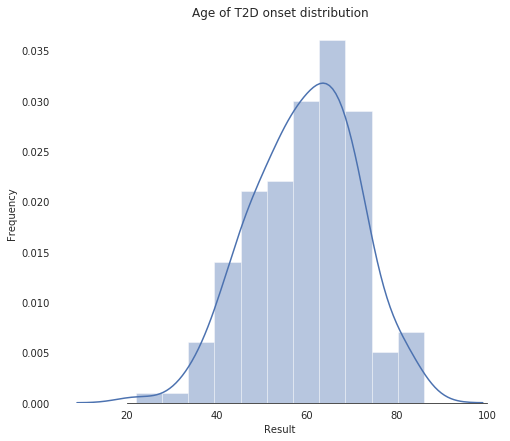

In [19]:
age_data = single_data1[single_data1['Age of T2D onset'].notna()]
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(age_data['Age of T2D onset'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Result")
ax.set(title="Age of T2D onset distribution")
sns.despine(trim=True, left=True)
plt.show()

In [76]:
single_data1.to_csv(bp_file_p, index=False)